Information of Dataset:
 <bound method DataFrame.info of       SL   SW   PL   PW    Species
0    5.1  3.5  1.4  0.2     Setosa
1    4.9  3.0  1.4  0.2     Setosa
2    4.7  3.2  1.3  0.2     Setosa
3    4.6  3.1  1.5  0.2     Setosa
4    5.0  3.6  1.4  0.2     Setosa
..   ...  ...  ...  ...        ...
145  6.7  3.0  5.2  2.3  Virginica
146  6.3  2.5  5.0  1.9  Virginica
147  6.5  3.0  5.2  2.0  Virginica
148  6.2  3.4  5.4  2.3  Virginica
149  5.9  3.0  5.1  1.8  Virginica

[150 rows x 5 columns]>
Shape of Dataset (row x column):  (150, 5)
Columns Name:  Index(['SL', 'SW', 'PL', 'PW', 'Species'], dtype='object')
Total elements in dataset: 750
Datatype of attributes (columns): SL         float64
SW         float64
PL         float64
PW         float64
Species     object
dtype: object
First 5 rows:
               0       1       2       3       4
SL          5.1     4.9     4.7     4.6     5.0
SW          3.5     3.0     3.2     3.1     3.6
PL          1.4     1.4     1.3     1.5     1.4


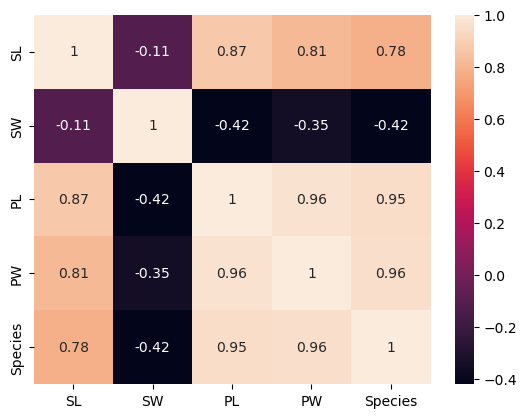

ValueError: Input X contains NaN.
GaussianNB does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [3]:
# Assignment number 6:
 # Load the Iris dataset
 # Display basic information
 # Display statistical information
 # Display null values
 # Fill the null values
 # Feature Engineering through correlation matrix
 # Build the Gaussian Naive Bayes Model and find its classification score
 # Remove outliers and again see the accuracy of the model
#---------------------------------------------------------------------------------------
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------------------------------------------------------------
def RemoveOutlier(df,var):
 Q1 = df[var].quantile(0.25)
 Q3 = df[var].quantile(0.75)
 IQR = Q3 - Q1
 high, low = Q3+1.5*IQR, Q1-1.5*IQR

 print("Highest allowed in variable:", var, high)
 print("lowest allowed in variable:", var, low)
 count = df[(df[var] > high) | (df[var] < low)][var].count()
 print('Total outliers in:',var,':',count)
 df = df[((df[var] >= low) & (df[var] <= high))]
 return df
#---------------------------------------------------------------------------------------
def BuildModel(X, Y):
 # Training and testing data
 from sklearn.model_selection import train_test_split
 # Assign test data size 20%
 xtrain, xtest, ytrain, ytest =train_test_split(X,Y,test_size= 0.25, random_state=0)
 # from sklearn.linear_model import LogisticRegression
 # model = LogisticRegression(solver = 'lbfgs')
 from sklearn.naive_bayes import GaussianNB
 model = GaussianNB()
 model = model.fit(xtrain,ytrain)
 ypred = model.predict(xtest)

 from sklearn.metrics import confusion_matrix
 cm = confusion_matrix(ytest, ypred)
 sns.heatmap(cm, annot=True)
 plt.show()
 from sklearn.metrics import classification_report
 print(classification_report(ytest, ypred))
#---------------------------------------------------------------------------------------
# Reading dataset
df = pd.read_csv('iris.csv')
df = df.drop('Id', axis=1)
df.columns = ('SL', 'SW', 'PL', 'PW', 'Species')
# Display basic information
print('Information of Dataset:\n', df.info)
print('Shape of Dataset (row x column): ', df.shape)
print('Columns Name: ', df.columns)
print('Total elements in dataset:', df.size)
print('Datatype of attributes (columns):', df.dtypes)
print('First 5 rows:\n', df.head().T)
print('Last 5 rows:\n',df.tail().T)
print('Any 5 rows:\n',df.sample(5).T)
#---------------------------------------------------------------------------------------
# Display Statistical information
print('Statistical information of Numerical Columns: \n',df.describe())
#---------------------------------------------------------------------------------------
# Display Null values
print('Total Number of Null Values in Dataset:', df.isna().sum())
#---------------------------------------------------------------------------------------
# Label encoding method
df['Species']=df['Species'].astype('category')
df['Species']=df['Species'].cat.codes
# Display correlation matrix
sns.heatmap(df.corr(),annot=True)
plt.show()
#---------------------------------------------------------------------------------------
# Choosing input and output variables from correlation matrix
X = df[['SL','SW', 'PL', 'PW']]
Y = df['Species']
BuildModel(X, Y)
#---------------------------------------------------------------------------------------
# Checking model score after removing outliers
fig, axes = plt.subplots(2,2)
sns.boxplot(data = df, x ='SL', ax=axes[0,0])
sns.boxplot(data = df, x ='SW', ax=axes[0,1])
sns.boxplot(data = df, x ='PL', ax=axes[1,0])
sns.boxplot(data = df, x ='PW', ax=axes[1,1])
plt.show()
df = RemoveOutlier(df, 'SW')
# Choosing input and output variables from correlation matrix
X = df[['SL','SW', 'PL', 'PW']]
Y = df['Species']
BuildModel(X, Y)
#After removing outliers accuracy is reducing due to overfitting of the model